In [1]:
#!/usr/bin/python
# updated DBR 11/2023 #

%matplotlib inline

import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#for mixed effects models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import resource; resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

import os

sns.set_style("ticks")

import warnings
warnings.filterwarnings(action='once')


In [3]:
#read output dataframe from data cleaning and ecology metrics/fitting scripts

dfall=pd.read_csv('ecometrics_wprovirusrecalc.csv') #restricted to persistent clonotypes
#dfall=pd.read_csv('ecometrics.csv') #restricted to persistent clonotypes

metrics=['R', 'D1', 'D2', 'cfrac', 'cmax']

dfall.columns

Index(['Unnamed: 0', 'pid', 'Age', 'Male', 'CMVstatus', 'mo_post_ART',
       'study_months', 'CD4', 'Nadir CD4', 'mo_pre_ART', 'race', 'cohort',
       'cohort_num', 'HIVstatus', 'initial_N', 'resample_size_TCR',
       'resample_size_HIV', 'color', 'nonsingleton_R', 'R', 'D1', 'D2', 'cmax',
       'c10', 'cfrac', 'RH', 'D1H', 'D2H', 'cmaxH', 'c10H', 'cfracH', 'RMS1',
       'al', 'RMS2', 'alpha1', 'alpha2', 'phi', 'cp', 'nonsingleton_Rr', 'Rr',
       'D1r', 'D2r', 'cmaxr', 'c10r', 'cfracr', 'RHr', 'D1Hr', 'D2Hr',
       'cmaxHr', 'c10Hr', 'cfracHr', 'RMS1r', 'alr', 'RMS2r', 'alpha1r',
       'alpha2r', 'phir', 'NHIV', 'nonsingleton_RHIV', 'RHIV', 'D1HIV',
       'D2HIV', 'cmaxHIV', 'c10HIV', 'cfracHIV', 'RMS1HIV', 'alHIV', 'RMS2HIV',
       'alpha1HIV', 'alpha2HIV', 'phiHIV', 'alHIVsample'],
      dtype='object')

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


R 1 2 0.22641102315834333
R 2 3 0.01919679026855479
R 1 4 0.23584676380100728
R 3 4 0.002291304140229303
D1 1 2 0.23524321102939483
D1 2 3 0.04158639863036084
D1 1 4 0.049796355435228076
D1 3 4 0.003130903764997982
D2 1 2 0.39750608598211906
D2 2 3 0.09509976238273243
D2 1 4 0.03456158389373819
D2 3 4 0.005682880422180336


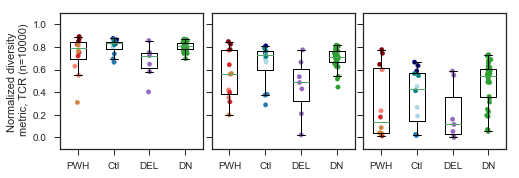

In [4]:
#plot TCR metrics by cohort number 

nn=10000
jit=0.03
sz=20
fig,axs=plt.subplots(1,3,figsize=(8,2.5),sharex=True,sharey=True)
for im,m in enumerate(metrics[:3]):
    
    ax=axs[im]
    
    ax.scatter(np.random.normal(0,jit,len(dfall))+dfall['cohort_num'],dfall[m]/nn,c=dfall['color'],s=sz)
    ax.boxplot([list(dfall[dfall['cohort_num']==kk][m]/nn) for kk in [1,2,3,4]])
    ax.set_xticks(np.arange(4)+1)
    ax.set_xticklabels(['PWH','Ctl','DEL','DN',],fontsize=10)
    
    p12=(st.mannwhitneyu(dfall[dfall['cohort_num'] == 1][m], dfall[dfall['cohort_num'] == 2][m])[1])
    p23=(st.mannwhitneyu(dfall[dfall['cohort_num'] == 2][m], dfall[dfall['cohort_num'] == 3][m])[1])
    p14=(st.mannwhitneyu(dfall[dfall['cohort_num'] == 1][m], dfall[dfall['cohort_num'] == 4][m])[1])
    p24=(st.mannwhitneyu(dfall[dfall['cohort_num'] == 2][m], dfall[dfall['cohort_num'] == 4][m])[1])
    p34=(st.mannwhitneyu(dfall[dfall['cohort_num'] == 3][m], dfall[dfall['cohort_num'] == 4][m])[1])
    
    print(m,1,2,p12)
    print(m,2,3,p23)
    print(m,1,4,p14)
    print(m,3,4,p34)
    #print(m,2,4,p24)

    #ax.annotate(np.round(p12,3),[1.1,9500])
    #ax.annotate(np.round(p23,3),[2.1,9500])
    #ax.annotate(np.round(p14,3),[2,10500])
    #ax.annotate(np.round(p24,3),[2.8,9100])
    
    #plt.title('D')
    ax.set_xlabel('')

ax.set_yticks(np.arange(0,1.1000,.2000))
ax.set_ylim([-0.1,1.1000])
    
axs[0].set_ylabel('Normalized diversity \n metric, TCR (n=10000)')
fig.subplots_adjust(wspace=0.06)

plt.savefig('figures/ecol_cohort_all2.pdf',dpi=600)
    


/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


0.0675201 0.1204953
0.00063778 0.14065609
1.14e-06 0.3060772


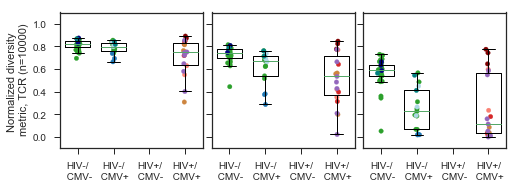

In [5]:
#plot TCR metrics by cohort number 

nn=10000
jit=0.03
sz=20
fig,axs=plt.subplots(1,3,figsize=(8,2.5),sharex=True,sharey=True)
for im,m in enumerate(metrics[:3]):
    
    ax=axs[im]
    xx=dfall['HIVstatus']*2 + dfall['CMVstatus']
    #sns.boxplot(data=dfall,hue='CMVstatus',y=m,x='HIVstatus',color='white',positions=[1,2,3,4])

    ax.boxplot(dfall[(dfall['HIVstatus'] == 0) & (dfall['CMVstatus'] == 0)][m].values/nn,positions=[0],widths=0.7)
    ax.boxplot(dfall[(dfall['HIVstatus'] == 0) & (dfall['CMVstatus'] == 1)][m].values/nn,positions=[1],widths=0.7)
    ax.boxplot(dfall[(dfall['HIVstatus'] == 1) & (dfall['CMVstatus'] == 1)][m].values/nn,positions=[3],widths=0.7)
    
    ax.scatter(np.random.normal(0,jit,len(dfall))+xx,dfall[m]/nn,c=dfall['color'],s=sz)
    
    MWp1=np.round(st.mannwhitneyu(dfall[(dfall['HIVstatus'] == 0) & (dfall['CMVstatus'] == 0)][m], 
                                 dfall[(dfall['HIVstatus'] == 0) & (dfall['CMVstatus'] == 1)][m])[1],8)

    MWp2=np.round(st.mannwhitneyu(dfall[(dfall['HIVstatus'] == 0) & (dfall['CMVstatus'] == 1)][m], 
                                 dfall[(dfall['HIVstatus'] == 1) & (dfall['CMVstatus'] == 1)][m])[1],8)

    print(MWp1,MWp2)
    ax.set_xlabel('')

ax.set_yticks(np.arange(0,1.1000,.2000))
ax.set_ylim([-0.1,1.1000])
ax.set_xlim([-0.5,3.5])

axs[0].set_ylabel('Normalized diversity \n metric, TCR (n=10000)')

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['HIV-/\n CMV-','HIV-/\n CMV+','HIV+/\n CMV-','HIV+/\n CMV+'])
fig.subplots_adjust(wspace=0.06)

plt.savefig('figures/ecol_HIV&CMVstatus_all.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


6.701217602789782e-09 5.770582575241915e-23 0.0010700240665342602
1.4421928031648172e-07 2.836382239766536e-22 0.006719267281180305
4.53984316271997e-05 2.4817611648134125e-22 0.0025284565370012127


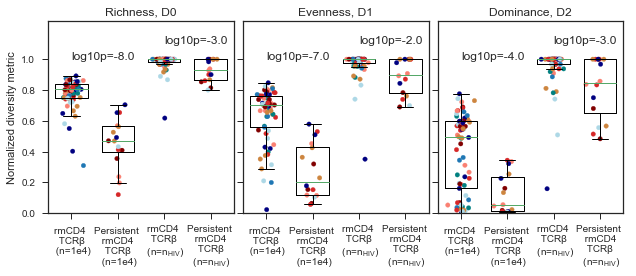

In [17]:
#persistent vs not vs HIV sample sizes

#first show rmCD4 and HIV infected cells not the same
plt.figure(figsize=(9,4))

df=dfall[(dfall['cohort_num'] == 1) | (dfall['cohort_num'] == 2)] #just longitudinal cohorts

df['NHIV']=df['NHIV'].fillna(60) #do this for the Ctl
dfall['NHIV']=dfall['NHIV'].fillna(60) #do this for the Ctl

titz=['Richness, D0','Evenness, D1',r'Dominance, D2']
#titz=['D0, Richness','D1, exp(Shannon)',r'D2, Simpson$^{-1}$']
jit=0.1
sz=20
for im,m in enumerate(['R','D1','D2']):
    
    plt.subplot(131+im)
     
    ml=[list(dfall[m]/nn),
        list(df[m+'r'].dropna()/nn),
        list((dfall[m+'H']/dfall['NHIV'])),
        list((df[m+'Hr']/df['NHIV']).dropna())]
        
    plt.boxplot(ml,positions=[1,2,3,4],widths=0.7)

    cz=df['color']
    for i in range(4):
        plt.scatter(np.random.normal(i+1,jit,len(ml[i])),ml[i],c=cz,s=sz)
    
    p1=st.mannwhitneyu(ml[0],ml[1])[1]
    p2=st.mannwhitneyu(ml[0],ml[2])[1]
    p3=st.mannwhitneyu(ml[2],ml[3])[1]

    plt.annotate('log10p='+str(np.round(np.log10(p1),0)),[1,1],)
    #plt.annotate('lp='+str(np.round(np.log10(p2),0)),[2.,1.1],)
    plt.annotate('log10p='+str(np.round(np.log10(p3),0)),[3.,1.1],)

    print(p1,p2,p3)
    
    plt.xlim(0.5,4.5)
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])
    plt.ylim(0,1.25)
    plt.xticks([1,2,3,4],['rmCD4 \n TCRβ \n (n=1e4)',
                        'Persistent \n rmCD4 \n TCRβ \n (n=1e4)',
                        'rmCD4 \n TCRβ \n ' + r'(n=n$_\mathregular{HIV}$)',
                        'Persistent \n rmCD4 \n TCRβ \n ' + r'(n=n$_\mathregular{HIV}$)',
                        'HIV \n infected \n cells'])#,rotation=90)

    plt.title(titz[im])
plt.subplot(131)
plt.ylabel('Normalized diversity metric')
plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
plt.savefig('figures/S4_persistentTCR.png',dpi=300)


In [18]:
#all TCR at HIV size vs HIV proviruses (split by PWH and DEL)

#all persistent TCR at HIV size vs HIV proviruses (only PWH)

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


0.00567867 0.01018097
0.00567867 0.01018097
0.00567867 0.08620875


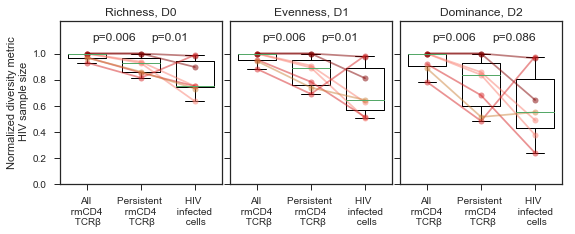

In [19]:
#first show rmCD4 and HIV infected cells not the same
plt.figure(figsize=(9,3))

df=dfall[(dfall['cohort_num'] == 1)] #just longitudinal cohort PWH

df=df[df['NHIV']>11]

jit=0.1
sz=20
for im,m in enumerate(['R','D1','D2']):
    
    plt.subplot(131+im)
    
    tdf=df[[m+'H',m+'Hr',m+'HIV','NHIV','color']].dropna() #this gets only the persistent TCR with dropna
    
    y1=(tdf[m+'H']/tdf['NHIV']).values
    y2=(tdf[m+'Hr']/tdf['NHIV']).values
    y3=(tdf[m+'HIV']/tdf['NHIV']).values
    
    plt.boxplot([y1,y2,y3],positions=[1,2,3],widths=0.7)
    
    for i in range(len(y1)):
        plt.plot([1,2,3],[y1[i],y2[i],y3[i]],color=tdf['color'].iloc[i],marker='o',markersize=6,alpha=0.5)
    
    #p1=np.round(st.ttest_rel(y1,y2)[1],8)
    #p2=np.round(st.ttest_rel(y2,y3)[1],8)
    #p1=np.round(st.mannwhitneyu(y1,y2)[1],8)
    #p2=np.round(st.mannwhitneyu(y2,y3)[1],8)
    
    #test whether difference is greater than 0
    p1=np.round(st.mannwhitneyu(y2-y1,np.zeros(len(y2)))[1],8)
    p2=np.round(st.mannwhitneyu(y3-y2,np.zeros(len(y2)))[1],8)
    
    plt.annotate('p='+str(np.round(p1,3)),[1.1,1.1],)
    plt.annotate('p='+str(np.round(p2,3)),[2.2,1.1],)

    print(p1,p2)
    #plt.title(titz[im])
    plt.xlim(0.5,3.5)
    plt.yticks(np.arange(0,1.01,.20))
    plt.ylim(0,1.25)
    plt.xticks([1,2,3],['All \n rmCD4 \n TCRβ',
                        'Persistent \n rmCD4 \n TCRβ',
                        'HIV \n infected \n cells'])#,rotation=90)
    
    plt.title(titz[im])
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric\n HIV sample size')

plt.subplots_adjust(wspace=0.05)
plt.savefig('figures/ecol_persistentTCRvsHIV.pdf',dpi=600)


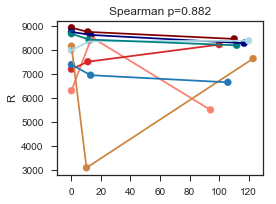

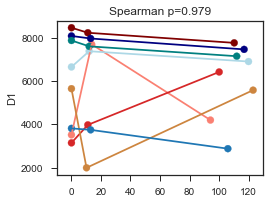

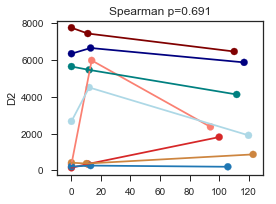

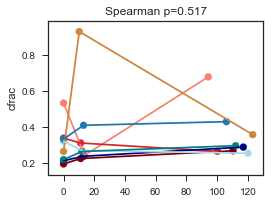

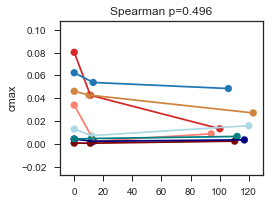

In [20]:
#plot all TCR metrics (not normalized) by time on ART, this doesn't save figures, just to see

#longitudinal cohorts
df = dfall[(dfall['cohort_num']==1) | (dfall['cohort_num']==2)]

for im,m in enumerate(metrics):
    plt.figure(figsize=(4,3))
    plt.scatter(df['study_months'],df[m],c=df['color'])
    plt.ylabel(m)
    
    for i in range(int(len(df)/3)):
        plt.plot(df['study_months'].iloc[3*i:3*(i+1)],df[m].iloc[3*i:3*(i+1)],color=df['color'].iloc[3*i])
    
    rho,sp=st.spearmanr(df['study_months'],df[m])

    plt.title('Spearman p='+str(np.round(sp,3)))
    plt.xlabel('')
    plt.xticks(range(0,121,20))
    plt.xlim([-10,130])
    plt.tight_layout()
    #plt.savefig('figures/moART_'+m+'.pdf',dpi=600)
    

/Applications/anaconda/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   R          
No. Observations:   24        Method:               REML       
No. Groups:         24        Scale:                892366.8131
Min. group size:    1         Likelihood:           -196.6437  
Max. group size:    1         Converged:            Yes        
Mean group size:    1.0                                        
---------------------------------------------------------------
               Coef.    Std.Err.   z    P>|z|  [0.025   0.975] 
---------------------------------------------------------------
Intercept      7698.953  146.055 52.713 0.000 7412.691 7985.216
study_months      0.031    5.300  0.006 0.995  -10.358   10.419
Group Var    892366.813                                        

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   D1          
No. Observations:   24        Method:               REML        

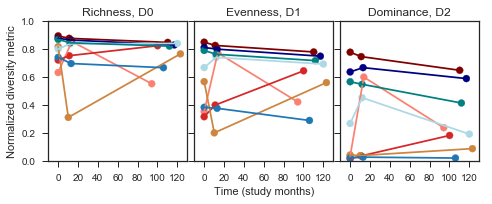

In [37]:
# now just diversity metrics normalized by time on ART
plt.figure(figsize=(7,3))

#longitudinal cohorts
df = dfall[(dfall['cohort_num']==1) | (dfall['cohort_num']==2)]

df = df[metrics[:3]+['study_months','color','pid']].dropna()
for im,m in enumerate(metrics[:3]):
    
    plt.subplot(131+im)
    plt.scatter(df['study_months'],df[m]/1e4,c=df['color'])
    #plt.ylabel(m)
    
    for i in range(int(len(df)/3)):
        plt.plot(df['study_months'].iloc[3*i:3*(i+1)],df[m].iloc[3*i:3*(i+1)]/1e4,color=df['color'].iloc[3*i])

    #run MEM
    md = smf.mixedlm(m+' ~ study_months', df, groups=df['pid'],)
    mdf = md.fit()
    print(mdf.summary())
    
    rho,sp=st.spearmanr(df['study_months'],df[m])

    #plt.title('p='+str(np.round(sp,3)))
    if im==1:
        plt.xlabel('Time (study months)')
    plt.xticks(range(0,121,20))
    plt.xlim([-10,130])
    plt.ylim([0,1])

    plt.title(titz[im])
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric')

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

#plt.tight_layout()
plt.savefig('figures/longit_diversity.pdf',dpi=600)
    


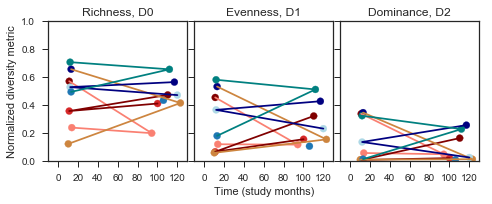

In [38]:
# PERSISTENT TCR metrics by time on ART
plt.figure(figsize=(7,3))

#longitudinal cohorts
df = dfall[(dfall['cohort_num']==1) | (dfall['cohort_num']==2)]

permets=['Rr','D1r','D2r']

df = df[permets+['study_months','color','pid']].dropna()
for im,m in enumerate(permets):
    
    plt.subplot(131+im)
    plt.scatter(df['study_months'],df[m]/1e4,c=df['color'])
    #plt.ylabel(m)
    
    for i in range(int(len(df)/3)):
        plt.plot(df['study_months'].iloc[3*i:3*(i+1)],df[m].iloc[3*i:3*(i+1)]/1e4,color=df['color'].iloc[3*i])

    #plt.title('p='+str(np.round(sp,3)))
    if im==1:
        plt.xlabel('Time (study months)')
    plt.xticks(range(0,121,20))
    plt.xlim([-10,130])
    plt.ylim([0,1])

    plt.title(titz[im])
    plt.yticks(np.arange(0,1.01,.20))
    if im>0:
        plt.gca().set_yticklabels([])

plt.subplot(131)
plt.ylabel('Normalized diversity metric')

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

plt.savefig('figures/longit_diversity_persistent.pdf',dpi=600)
    


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Applications/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


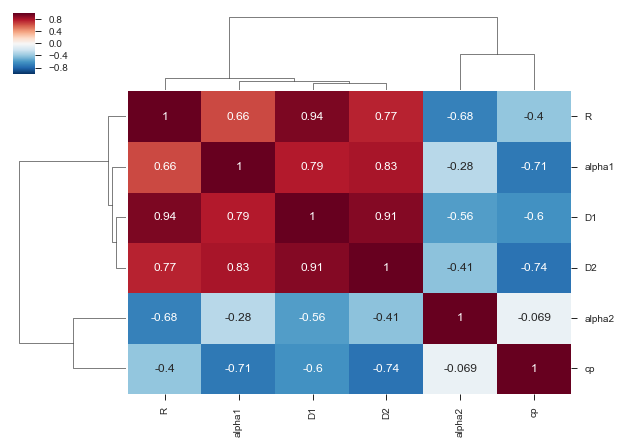

In [24]:
#check on metric correlations Hill numbers vs intuitive vs power law

m0=['R', 'D1', 'D2', 'alpha1', 'alpha2', 'cp']

corrmat=dfall[m0].corr(method='spearman')
g=sns.clustermap(corrmat,figsize=(10,7),annot=True)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.savefig('figures/cluster_metrics_abs.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Applications/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


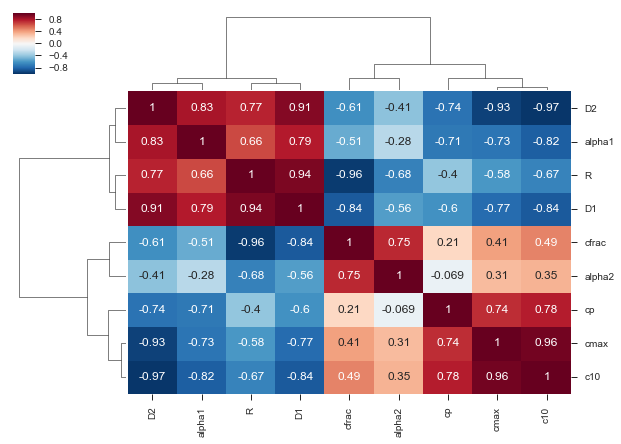

In [26]:
#check on metric correlations Hill numbers vs intuitive vs power law

m0=['R', 'D1', 'D2', 'cmax','c10', 'cfrac', 'alpha1', 'alpha2', 'cp']

corrmat=dfall[m0].corr(method='spearman')
g=sns.clustermap(corrmat,figsize=(10,7),annot=True)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.savefig('figures/cluster_metrics0_abs.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Applications/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


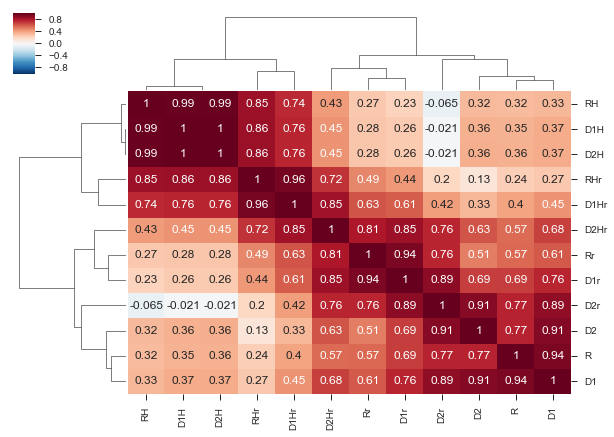

In [27]:
#check on metric correlations due to persistence/sampling

m1=['R', 'D1', 'D2', 
     'RH', 'D1H', 'D2H',
       'Rr','D1r', 'D2r',
        'RHr', 'D1Hr', 'D2Hr']

corrmat=dfall[m1].corr(method='spearman')
g=sns.clustermap(corrmat,figsize=(10,7),annot=True)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.savefig('figures/cluster_metrics1.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


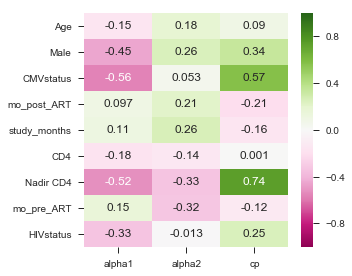

In [28]:
#correlate with clinical variables -- just the 3 groups above

clinical_metrics=['Age', 'Male', 'CMVstatus', 'mo_post_ART', 'study_months','CD4', 'Nadir CD4', 
                  'mo_pre_ART', 'HIVstatus']

corrmat=dfall.corr(method='spearman')

#corrmat=dfall.corr(method='spearman')

plt.figure(figsize=(5,4))
sns.heatmap(corrmat.loc[clinical_metrics,['alpha1','alpha2','cp']], annot=True, vmin=-1,vmax=1,cmap='PiYG')#,figsize=(7,6))
plt.tight_layout()
plt.savefig('figures/cluster_clin_vs_ecol.pdf',dpi=600)


In [29]:
#check on significance thersholds
#should have p<0.05/27=0.002
st.spearmanr(dfall['Male'],dfall['alpha1'])

SpearmanrResult(correlation=-0.4494998467063949, pvalue=0.0001529842581426632)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if xticklabels == []:


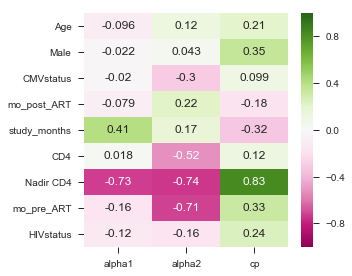

In [30]:
#correlate with clinical variables in the data set that has 2 slopes

clinical_metrics=['Age', 'Male', 'CMVstatus', 'mo_post_ART', 'study_months','CD4', 'Nadir CD4', 
                  'mo_pre_ART', 'HIVstatus']

twoslopedf = dfall[2*dfall['RMS2']<dfall['RMS1']] #no need to look at change points for models with RMS1~RMS2

corrmat=twoslopedf.corr(method='spearman')

#corrmat=dfall.corr(method='spearman')

plt.figure(figsize=(5,4))
sns.heatmap(corrmat.loc[clinical_metrics,['alpha1','alpha2','cp']], annot=True, vmin=-1,vmax=1,cmap='PiYG')#,figsize=(7,6))
plt.tight_layout()
plt.savefig('figures/cluster_clin_vs_ecol.pdf',dpi=600)


In [31]:
m1='study_months'
m2='alpha1'
x=twoslopedf[[m1,m2]].dropna()[m1]
y=twoslopedf[[m1,m2]].dropna()[m2]
st.spearmanr(x,y)


SpearmanrResult(correlation=0.4127015636572768, pvalue=0.23590343243519638)

In [34]:
m1='Nadir CD4'
m2='alpha2'
x=twoslopedf[[m1,m2]].dropna()[m1]
y=twoslopedf[[m1,m2]].dropna()[m2]
st.spearmanr(x,y)


SpearmanrResult(correlation=-0.7385489458759963, pvalue=0.014701629353731547)

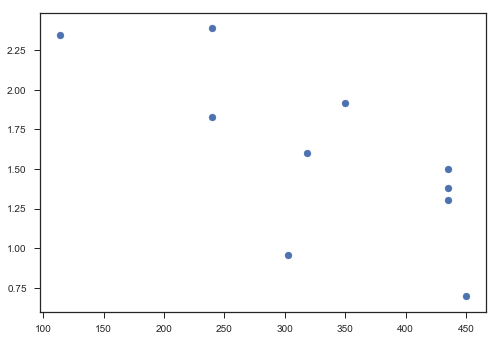

In [33]:
m1='Nadir CD4'
m2='alpha1'
x=twoslopedf[[m1,m2]].dropna()[m1]
y=twoslopedf[[m1,m2]].dropna()[m2]
st.spearmanr(x,y)

plt.scatter(x,y)